# Exercise 3

In this exercise, you will simulate an experiment designed to measure the lifetime of an unstable particle X.  A beam of X particles is produced with a known average momentum and injected into a vacuum chamber.  Each X particle will travel some distance into the chamber before decaying at the "decay vertex", $\textbf{r}_{vtx}$.  The charged daughter particle is then detected by four tracking stations, located at various distances ($z_{stn}$) along the beam line.  Each tracking station measures the position where the track hits the station, $\textbf{r}_{hit}$.

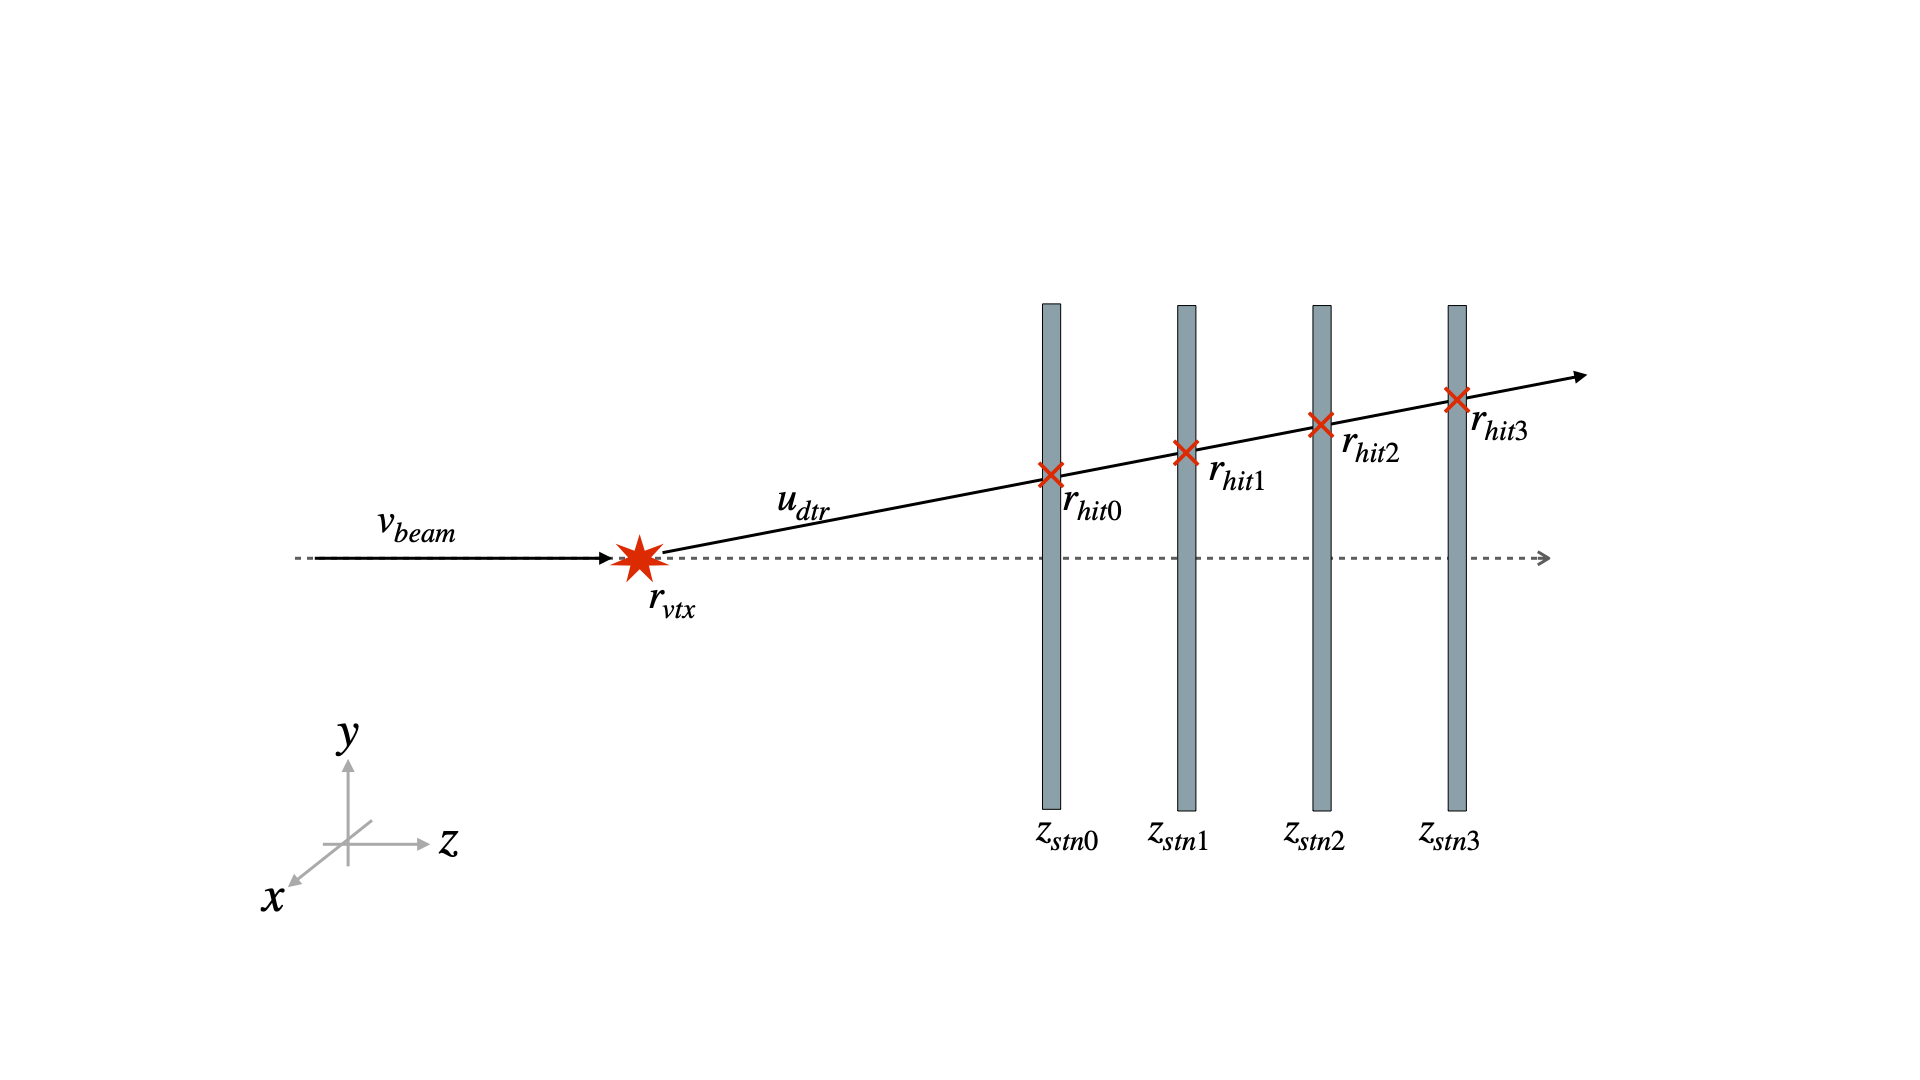

The coordinate system used is shown in the diagram, where the beam is produced at the origin and the average beam momentum is in the $z$-direction.

You will simulate the production and decay of particle X, as well as detection of its daughter particle. Each part of the exercise below deals with a different part of the experiment, for which you will generate random numbers with a specified distribution.  You will then verify the desired distribution is indeed produced - here a qualitative assessment is adequate, but a quantitative one is preferrable.

Use of simulation allows you to study the impact of different experimental choices, and your code should be capable of running with an arbitrary set of parameters. However, you can assume the initial set of parameters below : 
   * X mean lifetime, $\tau = 2.5 {\rm ms}$
   * Mean X velocity, $\mu_v = 2000 {\rm ms}^{-1}$
   * Std dev X velocity, $\sigma_v = 50 {\rm ms}^{-1}$
   * Tracking station positions, $z_{stn} = 30, 35, 40, 45 {\rm m}$
   * Tracking hit resolution, $\sigma_{rx, ry} = 0.01 {\rm m}$

It is strongly recommended that you use 3D vectors throughout the exercises, using numpy arrays, and numpy functions for vector algebra.

**Extensions**

A variety of extensions are possible to this exercise, drawing on some of the topics already covered in the unit. A few ideas are given below.  Please discuss any extension with the unit director before starting work.
   * Reconstructing the vertex location from the hit positions
   * Extracting the lifetime of the X particle from reconstructed vertex positions
   * Optimal placement of tracking stations


**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Part 1 - Beam Generation

First, you should simulate the production of X particles in the beam.  Each particle in the beam will have a velocity in the z-direction, that is drawn from a normal distribution with mean $\mu_{pz}$ and standard deviation $\sigma_{pz}$.  The particle should decay after a time that is drawn from an exponential distribution with mean lifetime $\tau$.  Given the velocity and the decay time, the decay position in the lab frame can then be calculated.  You can assume the beam is non-relativistic.

In the cell below, write functions to simulate the beam velocity, the decay time, and the decay vertex.

- [n/a] ~~calculate time step size then calculate how many time steps for each tau~~
- [n/a] ~~need better way to calculate timestep consistently or set as constant~~
- [n/a] ~~normalise tau using t/tau_(max)?~~
- [n/a] ~~find how many timesteps needed per particle then generate time evolution arrays~~
- [x] set up a n * 3 * 6 vector matrix with n (3 rows * 6 columns matrices) for posisition storage?
- [ ] add randomly generated seed to initial variables?
- [ ] count no. particles which miss the detectors
- [ ] define functions for plotting normal and exponential distributions
- [ ] fix exponential fits
- [ ] check unit consistency
- [ ] use smeared or unsmeared data for final impact determination?

In [54]:
%matplotlib qt
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import time


def bv(mu,sig, n):
    ''' '''

    vel = np.zeros((n,3))
    vel[:,-1] = np.random.normal(mu, sig, n)
    return vel

def bvmat(mu, sig, n, t):
    ''''''

    vel = np.zeros((n,3,t))
    for i in range(0, n):
        vel[i,-1,:] = np.random.normal(mu, sig, n)[i]
    return vel

def tau(n, tau_mean):
    ''''''

    return np.random.exponential(tau_mean,n)

def vert(vel, tau):
    ''''''

    return np.array([vel[i, -1] * tau[i] for i, x in enumerate(tau[:])])

def norm_fit(m, s, bins):
    ''''''
    print(m,s)

    fit = 1/(s * np.sqrt(2 * np.pi)) * np.exp( - 0.5 * ((bins - m) / s)**2)
    print(fit)
    return fit

def exp_fit(t, centres):
    ''''''

    fit = (1/ t) * np.exp(- (centres/t))

    return fit


'''------------------------------------Script------------------------------------'''

'''Variables'''
mu = 2000
sig = 50
tau_mean = 2.5e-3
n = 50
t = 100
tracksig = 0.01

pos = np.zeros((n, 3, 6)) #Array for position vector storage

stn = [30, 35, 40, 45] #Tracking station locations

In the next cell, test your functions, and verify that they have the desired distributions.

In [55]:
def prob_plotter(ptype, l_arr, num_bins, *prob_vars):
    ''''''

    fig, ax = plt.subplots()

    count, bins, ignored = plt.hist(l_arr, num_bins, edgecolor='blue', density=True) 
    plt.title("Exponential Distribution")

    centres = bins #(bins[1:] + bins[:-1])/2
    if ptype == 0:
        fit = norm_fit(prob_vars[0], prob_vars[1], bins)
        
    elif ptype == 1:
        fit = exp_fit(prob_vars[0], centres)

    ax.plot(centres, fit)
    plt.show()  

'''----------------------------------------------------------------------'''
vel = bv(mu, sig, n)
tau = tau(n, tau_mean)
vertices = vert(vel, tau)

pos[:, 2, 1] = vertices

bin0 = 100#np.linspace(mu - (5 * sig), mu + (5 * sig), 200)
bin1 = 250#np.arange(0,15e-3,0.0001)
bin2 = 250#np.arange(0,50,0.1)
# Copied----------------------------------
# fig, ax = plt.subplots()

# count, bins, ignored = ax.hist(vel[:,-1], 100, density=True)
# ax.plot(bins, norm_fit(mu, sig, bins), linewidth=2, color='r')

# fig, ax = plt.subplots()

# count, bins, ignored = plt.hist(tau, bin1, edgecolor='blue') 
# plt.title("Exponential Distribution")

# centres = (bins[1:] + bins[:-1])/2
# e_fit = exp_fit(tau_mean, centres)

# ax.plot(centres, e_fit)
# plt.show()

# fig, ax = plt.subplots()

# count, bins, ignored = ax.hist(vertices, bin2, edgecolor='blue') 
# plt.title("Exponential Distribution")
# centres = (bins[1:] + bins[:-1])/2
# ax.plot(centres, ((1/ tau_mean)) * np.exp(- (centres/(tau_mean))))
# plt.show()
prob_plotter(0, vel[:,-1], bin0, mu, sig)
prob_plotter(1, tau, bin1, tau_mean)
prob_plotter(1, vertices, bin2, tau_mean*mu)
#-----------------------------------------

fig, axs = plt.subplots(1,3)

count, bins, ignored = axs[0].hist(vel[:,-1], 100, density=True)

axs[0].plot(bins, 1/(50 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 2000)**2 / (2 * 50**2) ),
               linewidth=2, color='r')
axs[1].hist(tau, bins=bin1, edgecolor='blue')
axs[2].hist(vertices, bins=bin2, edgecolor='blue')  

2000 50
[0.00020197 0.000228   0.00025685 0.00028877 0.000324   0.00036279
 0.0004054  0.00045209 0.00050314 0.00055881 0.00061939 0.00068514
 0.00075633 0.00083322 0.00091607 0.00100511 0.00110057 0.00120265
 0.00131153 0.00142736 0.00155028 0.00168036 0.00181766 0.00196218
 0.0021139  0.00227273 0.00243853 0.00261112 0.00279025 0.00297562
 0.00316686 0.00336356 0.00356522 0.0037713  0.0039812  0.00419425
 0.00440974 0.00462688 0.00484487 0.00506283 0.00527986 0.00549502
 0.00570734 0.00591584 0.00611951 0.00631734 0.00650833 0.00669149
 0.00686584 0.00703044 0.00718437 0.00732678 0.00745684 0.00757381
 0.00767701 0.00776582 0.00783971 0.00789824 0.00794107 0.00796792
 0.00797863 0.00797315 0.0079515  0.00791382 0.00786033 0.00779136
 0.00770732 0.00760871 0.00749613 0.00737022 0.00723172 0.00708142
 0.00692017 0.00674887 0.00656845 0.00637988 0.00618415 0.00598226
 0.00577522 0.00556402 0.00534967 0.00513314 0.00491538 0.00469731
 0.0044798  0.00426369 0.00404977 0.00383877 0.0036313

(array([1., 0., 0., 0., 0., 2., 2., 1., 1., 0., 0., 3., 1., 0., 0., 0., 2.,
        1., 2., 2., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 1., 0., 0., 2.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

## Part 2 - Daughter Particle

Now simulate the direction of the decay product, which should be _isotropic_ in the rest frame of the beam particle. This is the same as generating points on the surface of a unit sphere, with uniform probability over the solid angle $d\Omega$. This can be achieved in spherical coordinates, by generating the two angles, $\phi$ and $\theta$.  These should not have uniform distributions, since the area element is given by :

$${\rm d}\Omega = \sin(\theta) {\rm d}\phi {\rm d}\theta$$

To obtain uniform probability over the sphere, you should generate $\phi$ with a uniform distribution between $0$ and $2\pi$, and $\theta$ with a distribution proportional to $\sin \theta$.

**Notes**
   * we will assume the direction in the lab frame is equivalent to the direction in the beam particle rest frame. This is a valid approximation, provided the daughter particle has much higher momentum than the beam particle.
   * we will assume the daughter moves in a straight line, which means we do not need to compute its momentum, ie. the direction vector is a unit vector.

In [56]:
rng = np.random.default_rng()
phi = (2*np.pi)*rng.random(n)
theta = np.arccos(1-2*rng.random(n))

X0 = np.zeros((n, 2))
Y0 = np.zeros((n, 2))
Z0 = np.zeros((n, 2))

X = np.cos(phi) * np.sin(theta)
Y = np.sin(phi) * np.sin(theta)
Z = np.cos(theta)

X0[:,1] = X
Y0[:,1] = Y
Z0[:,1] = Z

u = np.zeros((n,3))
u[:,:] = np.transpose((X,Y,Z))



As for Part 1, in the next cell, test your functions and verify the desired distributions are produced.

In [57]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X[::100], Y[::100], Z[::100], s= 0.2, alpha = 0.05)

for i in range(0,n):
    ax.plot(X0[i,::100], Y0[i,::100], Z0[i,::100], linewidth = 0.1, alpha = 0.2)
plt.show()


fig, ax = plt.subplots(1, 2)
ax[0].hist(phi, int(n/50), density=True)
ax[1].hist(theta, int(n/50), density=True)
plt.show()

'''Copied--------------------------------------------------------------'''
plt.figure()
count, bins, ignored = plt.hist(theta, 100, density=True)
bin_centres = (bins[1:] + bins[:-1])/2
plt.plot(bin_centres, np.sin(bin_centres)/2, label=r'$sin(\theta)$')
'''--------------------------------------------------------------------'''



plt.show()

## Part 3 - Propagation to Tracking Stations

The next step is to propagate the daughter particle to the tracking detectors. We can assume the particle takes a straight line path from the decay vertex. Since the tracking stations are at fixed values of $z$, the propagation is most easily performed by writing the path as two functions, giving the $x$ and $y$ coordinates as function of $z$ :

$$x(z) = m_x z + c_x$$
$$y(z) = m_y z + c_y$$

The gradients $m_x = \frac{dx}{dz}$ and $m_y = \frac{dy}{dz}$ can be computed directly from the components of the the daughter particle direction vector, $\textbf{u}_{dtr}$.

The intercepts $c_x$ and $c_y$, can then be found by solving the straight line equations given the $(x,y,z)$ coordinates of the decay vertex, $\textbf{r}_{vtx}$.

In [58]:
def path(u):
    ''''''
    
    mx = u[:,0]/u[:,2]
    my = u[:,1]/u[:,2]

    cx = u[:,0]/mx
    cy = u[:,1]/my

    return mx, cx, my, cy

mx, cx, my, cy = path(u)

print(np.shape(mx*stn[0] + cx))


(50,)


In the next cell, test your track propagation functions. (A qualitative assessment is acceptable here).

In [59]:
for i in range(2,6):
    pos[:,:,i] = np.transpose(np.array((mx*stn[i-2] + cx, my*stn[i - 2] + cy, np.full(n,stn[i - 2]))))


# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# ax.set_ylim(-100,100)
# ax.set_zlim(-100,100)

# xx, yy = np.meshgrid((np.amin(pos[:,0,:]),np.amax(pos[:,0,:])),
#                       (np.amin(pos[:,1,:]) ,np.amax(pos[:,1,:])))

# for i in range(0, 4):
#     ax.plot_surface(np.full((2,2),stn[i]), xx, yy, alpha=0.2)

# for i in range(0,n):
#     ax.plot(pos[i,2,:], pos[i,0,:], pos[i,1,:], linewidth = 0.1)

# plt.show()
#print(pos)

## Part 4 - Hit Smearing

The tracking detectors are not perfect, and will measure position with finite resolution.  This can be simulated by adding offsets (in x and y directions) to the true hit position, where the offsets are drawn from a normal distribution with a mean of zero and a standard deviation equal to the resolution of the detector.  This process is known as smearing.

You should write a function which takes the true hit positions and smears them according to the detector resolution, to produce the reconstructed (or measured) hit positions.

In [60]:
def smearing(p0):
    ''''''
    p = np.copy(p0) # Avoid overwriting position array
    p[:,:2,2:] = p[:,:2,2:] + np.random.normal(0, tracksig, (n, 2, 4))

    return p

pos_s = smearing(pos)

# print(pos[0,:,3])
# print(pos_s[0,:,3])
# print(pos_s - pos)
# print(pos_s)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_ylim(-100,100)
ax.set_zlim(-100,100)

xx, yy = np.meshgrid((np.amin(pos_s[:,0,:])/10000,np.amax(pos_s[:,0,:])/10000),
                      (np.amin(pos_s[:,1,:])/10000 ,np.amax(pos_s[:,1,:])/10000))

xx2, yy2 = np.meshgrid((-50, 50),
                       (-50, 50))

for i in range(0, 4):
    ax.plot_surface(np.full((2,2),stn[i]), xx2, yy2, alpha=0.2)

# z0 = np.full((2,2),stn[0])
# z1 = np.full((2,2),stn[1])
# z2 = np.full((2,2),stn[2])
# z3 = np.full((2,2),stn[3])

# # ax.plot_surface(z0, xx, yy, alpha=0.2)
# # ax.plot_surface(z1, xx, yy, alpha=0.2)
# # ax.plot_surface(z2, xx, yy, alpha=0.2)
# # ax.plot_surface(z3, xx, yy, alpha=0.2)

# ax.plot_surface(z0, xx2, yy2, alpha=0.2)
# ax.plot_surface(z1, xx2, yy2, alpha=0.2)
# ax.plot_surface(z2, xx2, yy2, alpha=0.2)
# ax.plot_surface(z3, xx2, yy2, alpha=0.2)

for i in range(0,n):
    ax.plot(pos_s[i,2,:], pos_s[i,0,:]/1000, pos_s[i,1,:]/1000, linewidth = 0.1)

Again, you should test your code to verify that the desired distributions are indeed produced.

In [61]:
'''Copied--------------------------------------------------------------'''
# print(pos_s[:,0,2])
# print(pos_s - pos)

fig, ax = plt.subplots(1, 2, sharex= True, sharey= True)
var = ('x', 'y')
for i in (0,1):
    count, bins, ignored = ax[i].hist(pos_s[:,i,3] - pos[:,i,3], 100, density=True)
    bin_centres = (bins[1:] + bins[:-1])/2

    ax[i].plot(bin_centres, 1/(tracksig * np.sqrt(2 * np.pi)) *
                        np.exp( - (bins[:-1] - 0)**2 / (tracksig**2)/2))
    ax[i].set_title(var[i])

plt.suptitle('fuckers')
'''--------------------------------------------------------------------'''

'--------------------------------------------------------------------'

## Part 5 - Experiment Simulation

Now you are ready to simulate the full experiment.  You should produce a large sample of events.  For each event, generate a beam particle, a daughter particle, and finally the true and smeared hits.

Given a sample of events, it is possible to compute a range of parameter distributions that will inform the design of the experiment.  You should present at least the following distributions :
   * The number of hit tracking stations
   * The 2D (x,y) distribution of measured hits on each of the four stations

In [75]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
#for j in range(2, 6):
for k in range(0,2):
    for m in range(0,2):
        ax[k,m].scatter(pos_s[:,0, 2 + k + m]/1000,
                        pos_s[:,1, 2 +  k + m]/1000,
                        marker = 'x', s = 0.1)

detector = ((-50,-50),(-50,50),(50,50),(50,-50),(-50,-50))

detector = np.array([[-50, -50, 50, 50, -50], [-50, 50, 50, -50, -50]])

for row in ax:
    for col in row:
        col.plot(detector[0],detector[1])
        col.set_aspect('equal')
        col.set_xlim(-100,100)
        col.set_ylim(-100,100)
fig.tight_layout()
        

pre1 = time.perf_counter()
a = np.sort(pos_s, 1)
post1 = time.perf_counter()

pre2 = time.perf_counter()
condition = np.any(pos_s[:, 0, :], where= 50)  #and pos_s[:, 0, :].any() <= 50\
     #and pos_s[:, 1, :].any() >= -50 and pos_s[:, 1, :].any() <= 50

b = np.extract(condition, pos_s)#(pos_s[:,0,:] > -50) & (pos_s[:,0,:] < 50) & (pos_s[:,1,:] > -50) & (pos_s[:,1,:] < 50))#, pos_s)
post2 = time.perf_counter()

diff1 = post1 - pre1
diff2 = post2 - pre2

c = [(x, y, z) for (x, y, z) in pos_s[:,(0,1,2),:] if pos_s[:,0,:].any() > -50 and pos_s[:,0,:].any() < 50]

print(diff1, diff2)
print(pos_s)
print('A', a)
print(b)
print(np.shape(a))
print(np.shape(b))

print(np.shape(c))

print(a-c)

0.00012411799980327487 0.00014876399654895067
[[[ 0.00000000e+00  0.00000000e+00 -3.18866895e+01 -3.73201493e+01
   -4.27433399e+01 -4.81638396e+01]
  [ 0.00000000e+00  0.00000000e+00  1.13546502e+00  1.18498235e+00
    1.25082686e+00  1.35833449e+00]
  [ 0.00000000e+00  1.52398168e+01  3.00000000e+01  3.50000000e+01
    4.00000000e+01  4.50000000e+01]]

 [[ 0.00000000e+00  0.00000000e+00  3.66187571e+01  4.26321574e+01
    4.86356033e+01  5.46377089e+01]
  [ 0.00000000e+00  0.00000000e+00  2.09097159e+01  2.42772850e+01
    2.76778020e+01  3.10637248e+01]
  [ 0.00000000e+00  3.54382718e+00  3.00000000e+01  3.50000000e+01
    4.00000000e+01  4.50000000e+01]]

 [[ 0.00000000e+00  0.00000000e+00  8.14432497e+00  9.34798161e+00
    1.05446466e+01  1.17441340e+01]
  [ 0.00000000e+00  0.00000000e+00  1.21304969e+01  1.40270952e+01
    1.58884835e+01  1.77495567e+01]
  [ 0.00000000e+00  4.81238220e-01  3.00000000e+01  3.50000000e+01
    4.00000000e+01  4.50000000e+01]]

 [[ 0.00000000e+00  0

## Part 6 - Summary

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 400-500 words.